# Lab 01
---------------------------
Maurice Woods - Aerospace Engineering Masters Student (Control Systems)

ECEN 5002 Communications Lab

25 Jan 2017

### Goals of this Lab

* Learn how to approximate CT signals by DT sequences in Python.
* DT approximations to integration and differentiation of signals in Python.
* Generation of binary unipolar flat-top PAM from ASCII text string.
* Build a receiver for text strings transmitted using flat-top PAM.
* Generate and receive PCM signals.
-------------------------------

## Lab Experiments
### E1 - Signals In Python
##### Part A.)



In [1]:
from pylab import *
from ast import literal_eval
#%matplotlib inline
#plt.rc('text', usetex=True) 

import matplotlib.pyplot as plt
import numpy as np
from quickplot import quickplot

debug = 'OFF'

plt.close('all')

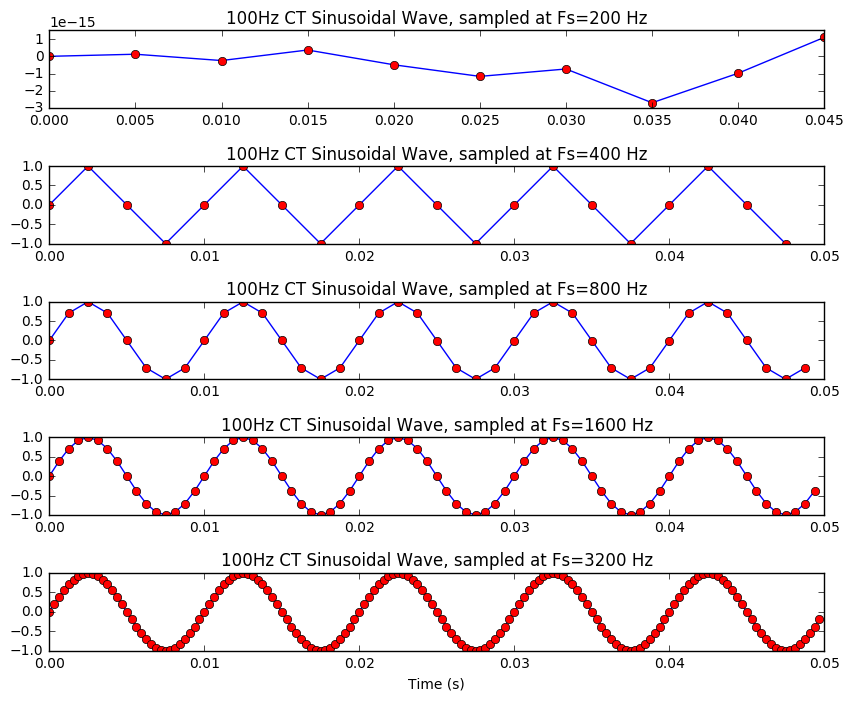

In [2]:
from sine100 import sampler

sampleFreq=[200,400,800,1600,3200]
plt.figure(1,figsize=(10,8))
for f in range(0,len(sampleFreq)):
    Fs,tt,st = sampler(sampleFreq[f])
    plt.subplot(511+f)
    plt.subplots_adjust(hspace=0.75)
    plt.plot(tt,st,'b-',tt,st,'ro')
    plt.title("100Hz CT Sinusoidal Wave, sampled at Fs=%d Hz" % (sampleFreq[f]))
plt.xlabel('Time (s)')
plt.show()

The smallest Fs which yields a "nice", representative graph of a 100Hz CT sinusoid is Fs=800Hz

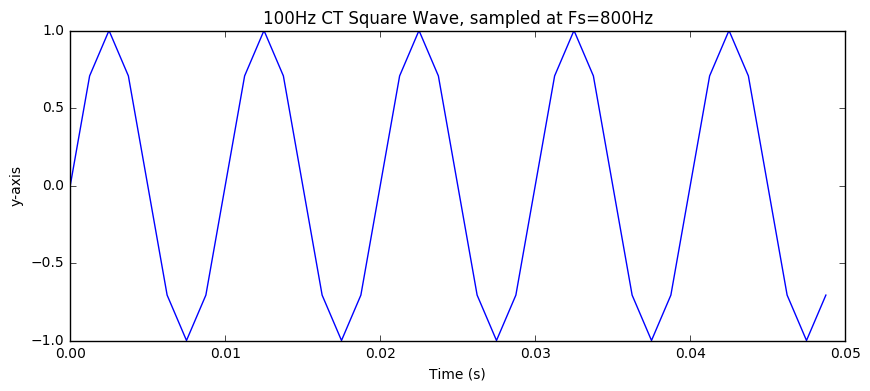

In [3]:
Fs,tt,st = sampler(800)
quickplot(tt,st,'Time (s)','y-axis','100Hz CT Square Wave, sampled at Fs=800Hz')

---------------------
##### Part B.)

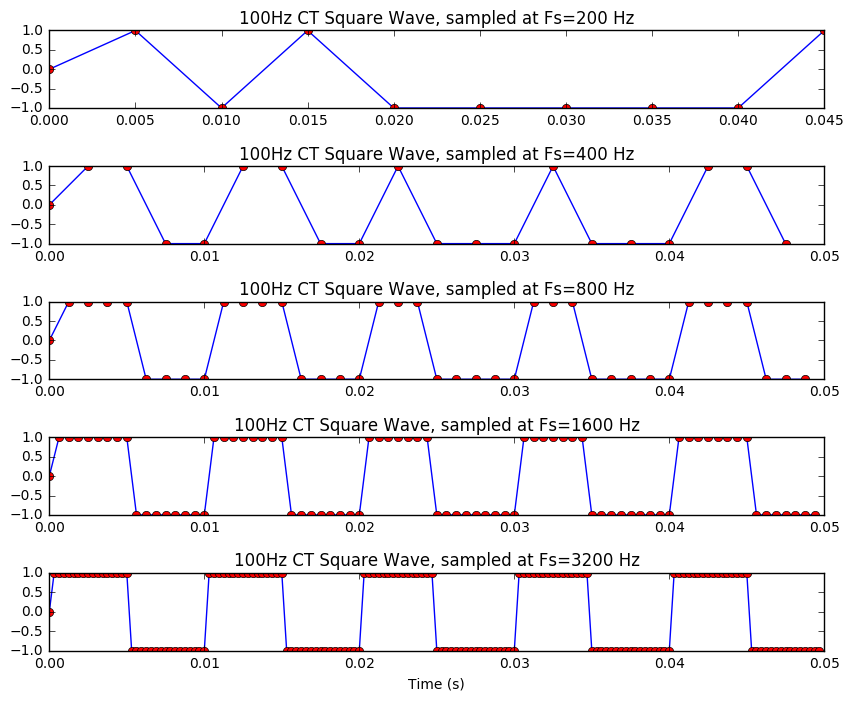

In [4]:
plt.figure(2,figsize=(10,8))
for f in range(0,len(sampleFreq)):
    Fs,tt,st = sampler(sampleFreq[f])
    rt = sign(st)
    plt.subplot(511+f)
    plt.subplots_adjust(hspace=0.75)
    plt.plot(tt,rt,'b-',tt,rt,'ro')
    plt.title("100Hz CT Square Wave, sampled at Fs=%d Hz" % (sampleFreq[f]))
plt.xlabel('Time (s)')
plt.show()

The smallest Fs which yields a "nice", representative graph of a 100Hz CT rectangular signal is, again, Fs=800Hz

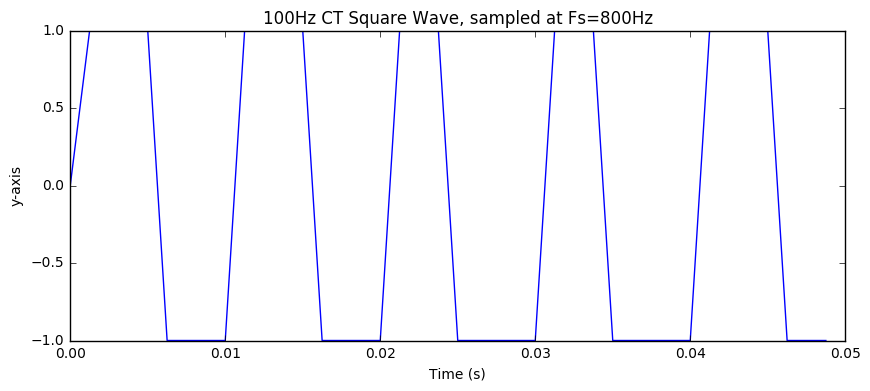

In [5]:
Fs,tt,st = sampler(800)
rt = sign(st)
quickplot(tt,rt,'Time (s)','y-axis','100Hz CT Square Wave, sampled at Fs=800Hz')

---------------
##### Part C.)

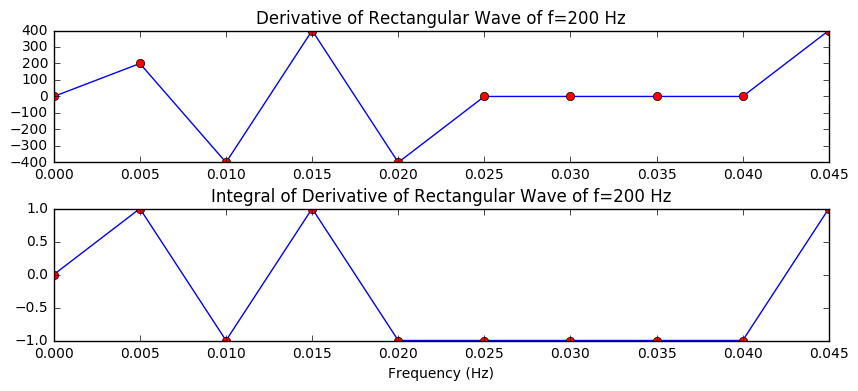

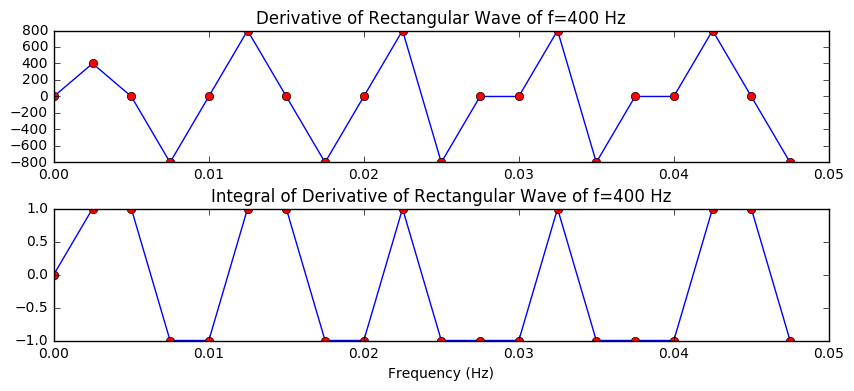

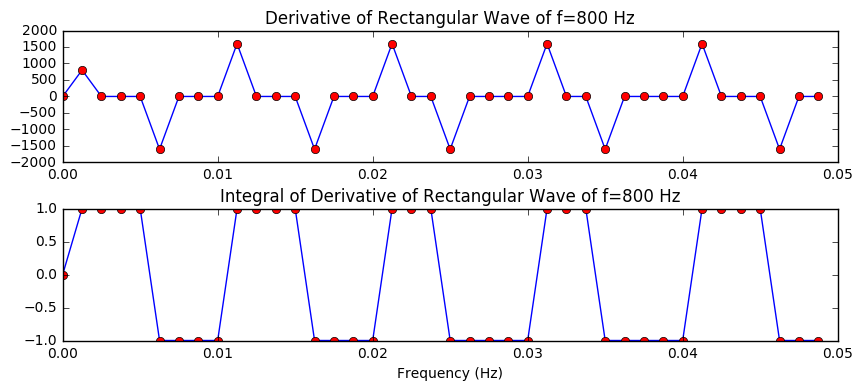

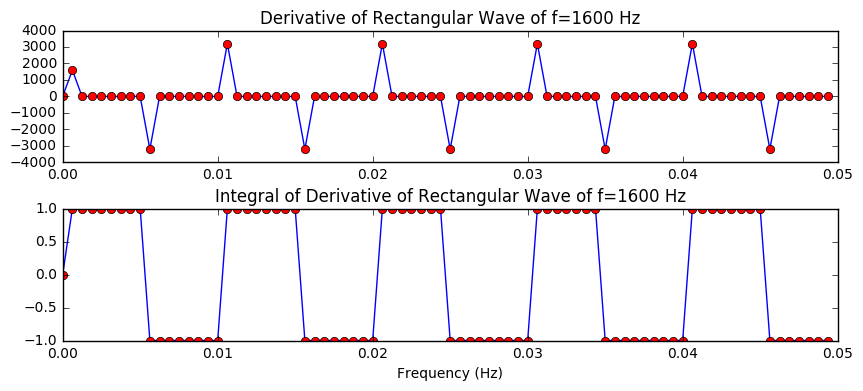

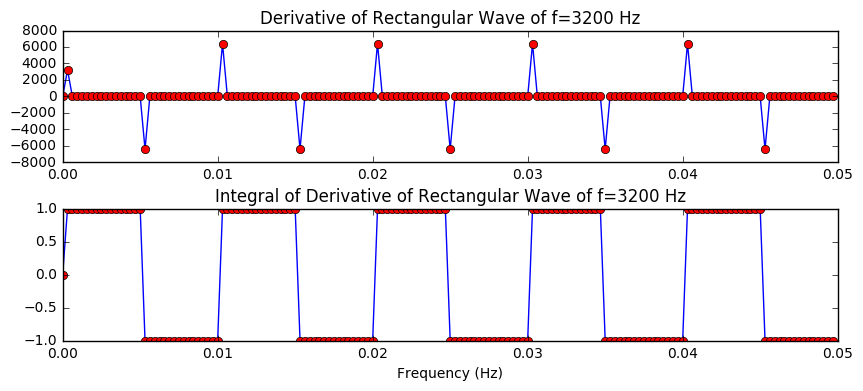

In [6]:
#plt.figure(3,figsize=(10,8))
for f in range(0,len(sampleFreq)):
    plt.figure(1,figsize=(10,4))
    Fs,tt,st = sampler(sampleFreq[f])
    rt = sign(st)
    if debug is 'ON':
        print(rt)
        print(hstack((0,rt)))
        print(diff(hstack((0,rt))))
    rdt = diff(hstack((0,rt)))*Fs
    plt.subplot(211)
    plt.subplots_adjust(hspace=0.35)
    plt.plot(tt,rdt,'b-',tt,rdt,'ro')
    plt.title("Derivative of Rectangular Wave of f=%d Hz" % (sampleFreq[f]))
    
    rdit = cumsum(rdt)/float(Fs)
    plt.subplot(212)
    plt.plot(tt,rdit,'b-',tt,rdit,'ro')
    plt.title("Integral of Derivative of Rectangular Wave of f=%d Hz" % (sampleFreq[f]))
    
    plt.xlabel('Frequency (Hz)')
    plt.show()
    print("\n\n")

----------------------
##### Part D.)

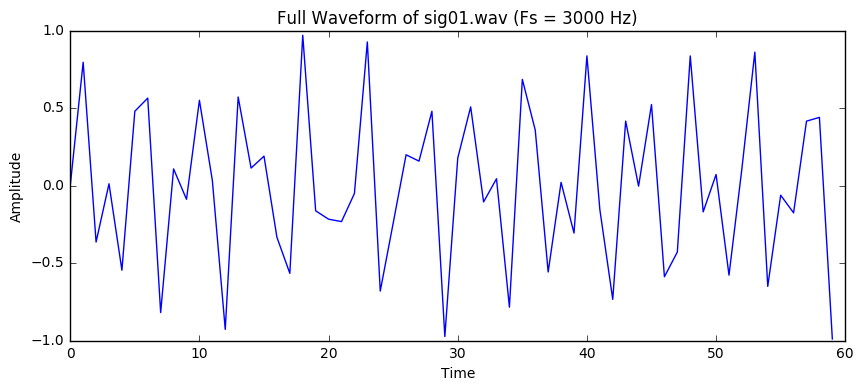

In [7]:
from wavfun import wavread
wave, framerate = wavread('sig01.wav')

tt = arange(0,round(len(wave)*framerate))/float(framerate)
quickplot(range(0,len(wave)),wave,'Time','Amplitude','Full Waveform of sig01.wav (Fs = %d Hz)' % (framerate))


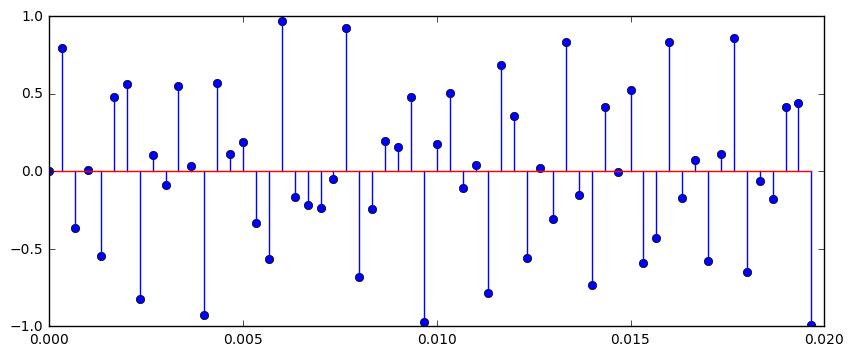

Multiplier:4


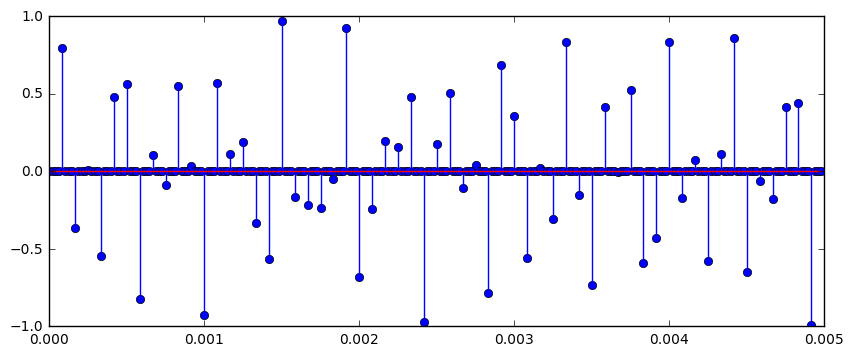

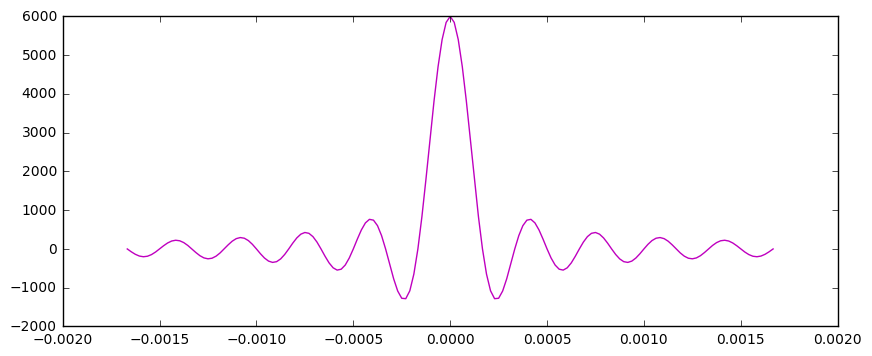

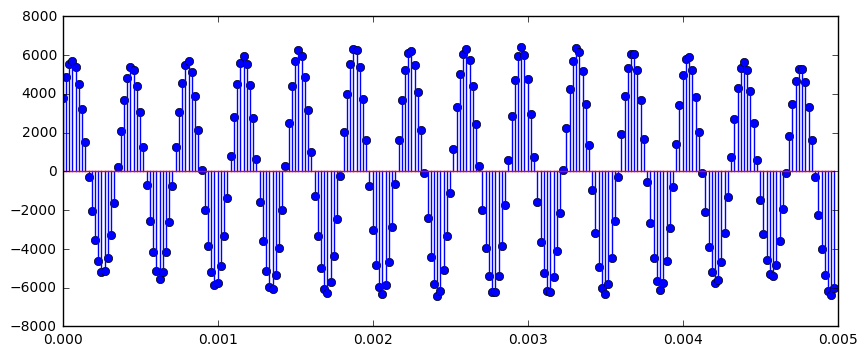

In [8]:
from wavSampler import wavSampler
wavSampler(12000,'sig01.wav')
#wave, framerate = wavread('sig01.wav')
#sampleFreq=[800,1600,3200,6400,12800]
#plt.figure(1,figsize=(10,8))
#for f in range(0,len(sampleFreq)):   
#    plt.subplot(511+f)
#    plt.subplots_adjust(hspace=0.75)
#    plt.plot(tt,samplewave,'b-',tt,samplewave,'ro')
#    plt.title("sig01.wav, sampled at Fs=%d Hz" % (sampleFreq[f]))
#plt.xlabel('Time (s)')
#plt.show()

--------------------------
### E2 - Flat-Top PAM
##### Part A.)

In [1]:
from pylab import *
from ast import literal_eval

In [2]:
from ftpam01 import bitstream
import ascfun

"Test" = 
[0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 0]


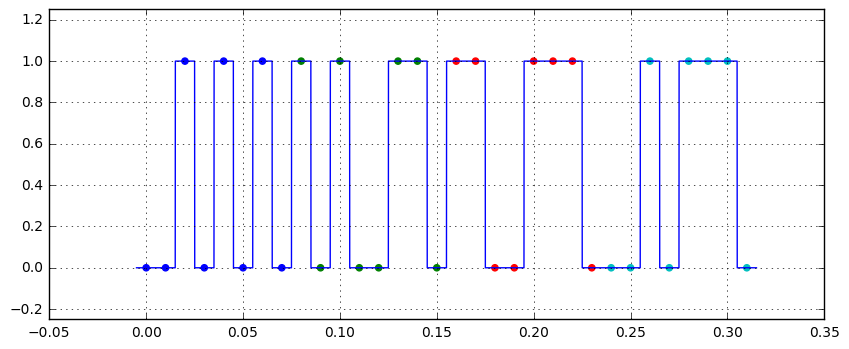

Outputting file as "Test.wav"


"Maurice!" = 
[1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0
 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0]


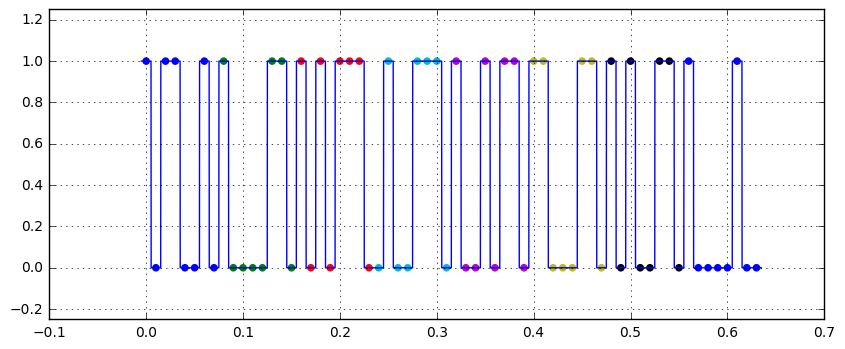

String is not alphanumeric...
Outputting file as "ascii2wav.wav"




In [4]:
bitstream("Test",8,"export")
bitstream("Maurice!",8,"export")

##### Part B.)

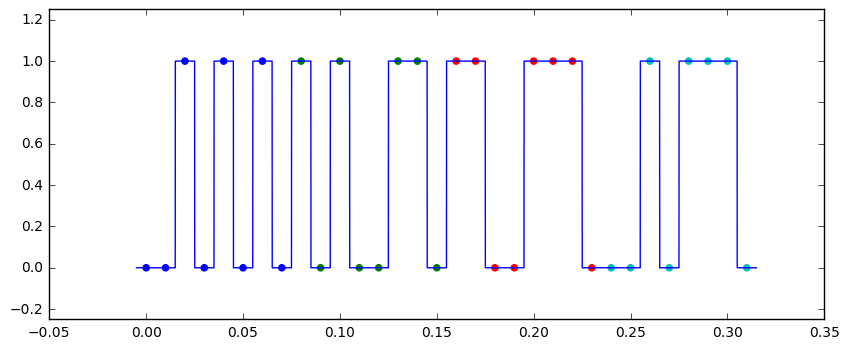

Test.wav reads: 
[ 0.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  0.  1.  1.  0.  1.  1.
  0.  0.  1.  1.  1.  0.  0.  0.  1.  0.  1.  1.  1.  0.]
[array([ 0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.]), array([ 1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.]), array([ 1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.]), array([ 0.,  0.,  1.,  0.,  1.,  1.,  1.,  0.])]
None


In [1]:
from ftpam_rcvr01 import wav2ascii

wav2ascii("Test.wav")